# Aproximación a derivadas e integrales
- Date: 15 June 2020

---
---

## Imports

#### Python libraries

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pytest import approx

---

## Ejemplo de la evaluación de una función

In [2]:
x = np.linspace(-1,1,100) #100 puntos equidistantes entre -1,1

In [3]:
y = lambda x: x**2

In [4]:
y_eval = y(x)

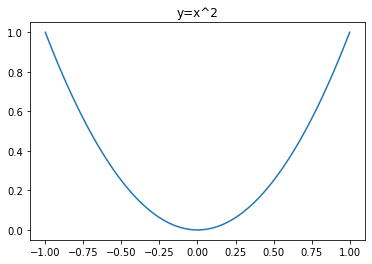

In [5]:
plt.plot(x,y_eval)
plt.title('y=x^2')
plt.show()

---

# Derivada de una función

Consideremos en lo que sigue $f: \mathbb{R} \rightarrow \mathbb{R}$.

$f$ es diferenciable en $x_0 \in (a,b)$ si $\displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}$ existe y escribimos:

$$f^{(1)}(x_0) = \displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}.$$

$f$ es diferenciable en $[a,b]$ si es diferenciable en cada punto de $[a,b]$. Análogamente definiendo la variable $h=x-x_0$ se tiene:


$f^{(1)}(x_0) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$ que típicamente se escribe como:

$$f^{(1)}(x) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}.$$

**Comentario:** si $f$ es diferenciable en $x_0$ entonces $f(x) \approx f(x_0) + f^{(1)}(x_0)(x-x_0)$. Gráficamente:

<img src="https://dl.dropboxusercontent.com/s/3t13ku6pk1pjwxo/f_diferenciable.png?dl=0" heigth="500" width="500">



**Notación:** $\mathcal{C}^n([a,b])=\{\text{funciones } f:\mathbb{R} \rightarrow \mathbb{R} \text{ con } n \text{ derivadas continuas en el intervalo [a,b]}\}$.

# Errores absolutos y relativos de una aproximación

Si `aprox` es mi cantidad con la que aproximo a mi objetivo `obj` entonces el error absoluto de `aprox` y el error relativo de `aprox` es:

$$ErrAbs(\text{aprox}) = |\text{aprox} - \text{obj}|.$$


$$ErrRel(\text{aprox}) = \frac{ErrAbs(\text{aprox})}{|\text{obj}|}.$$

**Obs:**

* Obsérvese que `obj` debe ser distinto de cero para que el error relativo esté bien definido.

* si $ErrRel(aprox) \approx 10^{-k}$ se dice que `aprox` aproxima a `obj` con alrededor de $k$ dígitos correctos. Por ejemplo si $k=3$ entonces la cantidad `aprox` aproxima a la cantidad `obj` con alrededor de $3$ dígitos de precisión.

---

# Aproximación a una función por el teorema de Taylor

Las fórmulas de aproximación a las derivadas por diferencias finitas y a integrales definidas en un intervalo por las reglas de cuadratura Newton-Cotes pueden obtenerse con los **polinomios de Taylor** presentes en el teorema del mismo autor, el cual, bajo ciertas hipótesis nos proporciona una expansión de una función alrededor de un punto. Otras opciones son con polinomios de Lagrange, ver [Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial). El teorema de Taylor es el siguiente:

Sea $f \in \mathcal{C}^n([a,b])$, $f^{(n+1)}$ existe en [a,b]. Si $x_0 \in [a,b]$ entonces $\forall x \in [a,b]$ se tiene: $f(x) = P_n(x) + R_n(x)$ donde: 

$$P_n(x) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)(x-x_0)^k}{k!} \quad (f^{(0)} = f)$$ y $$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$ con $\xi_x$ entre $x_0, x$ y $x_0$ se llama centro.

## Ejemplo:

Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son: 

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$

$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) =\frac{2}{3} - \frac{1}{1.5^2}(x-1.5) \quad \text{(lineal)}$$

$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{1}{x_0^3}(x-x_0)^2 = \frac{2}{3} -\frac{1}{1.5^2}(x-1.5) + \frac{1}{1.5^3}(x-1.5)^2 \quad \text{(cuadrático)}$$

**Ejercicio: graficar la función y los polinomios constante, lineal y cuadrático en una sola gráfica con `matplotlib` en el intervalo [1,2]. ¿Cuánto es la aproximación de los polinomios en x=1.9? Calcula el error relativo de tus aproximaciones.**

**Comentario:** otras aproximaciones a una función se pueden realizar con:

* Interpoladores polinomiales (representación por Vandermonde, Newton, Lagrange).


In [6]:
f = lambda x: 1/x

In [7]:
x0 = 1.5

In [8]:
## Forma funcional de los polinomios
p0 = lambda x: 2/3
p1 = lambda x: 2/3 - (1/(x0**2))*(x - x0)
p2 = lambda x: 2/3 - (1/(x0**2))*(x - x0) + 2/(3*x0**2)*(x - x0)**2

#### 1) Evaluar $P_0$:

In [9]:
x = 1

In [10]:
"{:0.4e}".format(p0(x))

'6.6667e-01'

In [11]:
"{:0.4e}".format(p1(x))

'8.8889e-01'

In [12]:
"{:0.4e}".format(p2(x))

'9.6296e-01'

#### 2) Crear array de x's donde serán evaluados los polinomios:

In [13]:
x = np.linspace(1, 2, 100) ## 100 puntos equidistantes de 1 a 2

In [14]:
p0_eval = p0(x)

In [15]:
p0_eval ## Esto no funciona :( ... por lo que debemos usar la línea de abajo

0.6666666666666666

In [16]:
p0_eval = p0(x)*np.ones(x.size)

In [17]:
p1_eval = p1(x)
p2_eval = p2(x)

#### 3) Gráficas

In [18]:
common_point = (x0, f(x0))

In [19]:
common_point

(1.5, 0.6666666666666666)

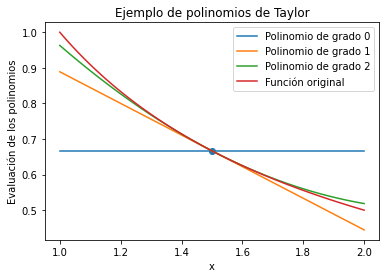

In [20]:
plt.plot(
    x, p0_eval,
    x, p1_eval,
    x, p2_eval,
    x, f(x)
)

plt.title("Ejemplo de polinomios de Taylor")
plt.xlabel("x"); plt.ylabel("Evaluación de los polinomios")
plt.legend(
    [
        "Polinomio de grado 0",
        "Polinomio de grado 1",
        "Polinomio de grado 2",
        "Función original"
    ]
)
plt.scatter(common_point[0], common_point[1])
plt.show()

#### Cálculo del error relativo

In [21]:
def relative_absolute_error(aprox, obj):
    if(np.abs(obj) > 0):
        return np.abs(aprox - obj)/np.abs(obj)
    else:
        return np.abs(aprox - obj)

In [22]:
x_test_point = 1.9

In [23]:
objective = f(x_test_point)

In [24]:
objective

0.5263157894736842

##### Aproximciones

In [25]:
p0_approx = p0(x_test_point)
p0_approx

0.6666666666666666

In [26]:
p1_approx = p1(x_test_point)
p1_approx

0.48888888888888893

In [27]:
p2_approx = p2(x_test_point)
p2_approx

0.5362962962962963

##### Error

In [28]:
p0_rel_err = relative_absolute_error(p0_approx, objective)
p0_rel_err

0.26666666666666666

In [29]:
p1_rel_err = relative_absolute_error(p1_approx, objective)
p1_rel_err

0.07111111111111099

In [30]:
p2_rel_err = relative_absolute_error(p2_approx, objective)
p2_rel_err

0.018962962962962973

In [31]:
print("Relative errors:")
print("p0: {:0.4e}".format(p0_rel_err))
print("p1: {:0.4e}".format(p1_rel_err))
print("p2: {:0.4e}".format(p2_rel_err))

Relative errors:
p0: 2.6667e-01
p1: 7.1111e-02
p2: 1.8963e-02


#### Tabla de resultados

In [32]:
dic = {
    "Polinomio": [
        "P0(x)",
        "P1(x)",
        "P2(x)",
    ],
    "Errores relativos": [
        p0_rel_err,
        p1_rel_err,
        p2_rel_err,
    ]
}

In [33]:
df = pd.DataFrame(dic)
df

,Polinomio,Errores relativos
0,P0(x),0.266667
1,P1(x),0.071111
2,P2(x),0.018963


---

# Diferenciación numérica por diferencias finitas

Las fórmulas de diferencias finitas pueden obtenerse con el teorema de Taylor. Por ejemplo:

Sea $f \in \mathcal{C}^1([a,b])$ y $f^{(2)}$ existe y está acotada $\forall x \in [a,b]$ entonces, si $x+h \in [a,b]$ con $h>0$ por el teorema de Taylor se tiene:

$$f(x+h) = f(x) + f^{(1)}(x)h + f^{(2)}(\xi_{x+h})\frac{h^2}{2}$$ con $\xi_{x+h} \in [x,x+h]$

Y al despejar $f^{(1)}(x)$ se tiene la **aproximación por diferencias hacia delante a la primera derivada de $f$**: 

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} - f^{(2)}(\xi_{x+h})\frac{h}{2}$$

**Obs:** la aproximación por diferencias finitas a la primer derivada de la función tiene un error de orden $\mathcal{O}(h)$ por lo que una elección de $h$ igual a $.1 = 10^{-1}$ generará aproximaciones con alrededor de un dígito correcto.

Así también pueden obtenerse la versión centrada y aproximaciones a la segunda derivada de $f$:

**Aproximación por diferencias hacia delante para la segunda derivada**

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

**Aproximación por diferencias centradas a la primer y segunda derivada**

$$ \frac{df(x)}{dx} \approx \frac{f(x+h)-f(x-h)}{2h}$$

$$ \frac{d^2f(x)}{dx} \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

**Interpretación geométrica de aproximación por diferencias centradas a la primer derivada de $f$:**

<img src="https://dl.dropboxusercontent.com/s/jwi0y1t5z58pydz/dif_centradas.png?dl=0" heigth="500" width="500">

**Ejercicio: aproximar la primera y segunda derivadas de la función `arctan` con diferencias finitas centradas en el punto x=0.5**

In [34]:
def central_approx_diff(f, x, h=0.0001): #el parámetro h tiene un valor default
    df =(f(x+h) - f(x-h))/(2.0*h)
    ddf =(f(x+h) - 2.0*f(x) + f(x-h))/h**2
    return df, ddf

In [35]:
#Ejemplo de llamada a función utilizando el parámetro de default de h=0.0001
x = 0.5 #punto donde se realizará la aproximación
df, ddf = central_approx_diff(math.atan, x)
print('Primera derivada:', df)
print('Segunda derivada:', ddf)

Primera derivada: 0.7999999995730867
Segunda derivada: -0.6400000029938013


In [36]:
#Ejemplo de llamada a función utilizando h=1e-6
h = 1e-6
x = 0.5
df, ddf = central_approx_diff(math.atan, 0.5, h)
print('Primera derivada:', df)
print('Segunda derivada:', ddf)

Primera derivada: 0.799999999995249
Segunda derivada: -0.6399880625451715


In [37]:
#Derivadas analíticas:
d = 1/(1+x**2)
dd = (-2*x)/(1+x**2)**2
print(d)
print(dd)

0.8
-0.64


In [38]:
rel_err_df = relative_absolute_error(df, d)
rel_err_df

5.938860514476119e-12

In [39]:
rel_err_ddf = relative_absolute_error(ddf, dd)
rel_err_ddf

1.8652273169571243e-05

**Obs:** la diferenciación numérica por diferencias finitas **no es un proceso con una alta exactitud** pues los problemas del redondeo de la aritmética en la máquina se hacen presentes en el mismo. Como ejemplo de esta situación hágase el siguiente ejercicio.

**Comentario:** otra forma de evaluar las aproximaciones realizadas es con módulos o paquetes de Python creados para este propósito en lugar de crear nuestras funciones como la de `relative_absolute_error`. En la siguiente celda instalamos el paquete [pytest](https://docs.pytest.org/en/latest/) y mostramos cómo evaluar la calidad de la aproximación con la función [approx](https://docs.pytest.org/en/latest/reference.html#pytest-approx) de este paquete:

Aquí estamos obteniendo que con la tolerancia default sí se cumple

In [42]:
df == approx(d)

True

Aquí estamos obteniendo que con la tolerancia default no se cumple

In [43]:
ddf == approx(dd)

False

Y podemos usar un valor definido de tolerancia definido para hacer la prueba (por default se tiene una tolerancia de $10^{-6}$): 

In [44]:
ddf == approx(dd, rel=1e-3,abs=1e-3)

True

**Ejercicios:** 

- [ ] 1) **(Tarea) Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$. Usar:**

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

- [x] 2) **Crear un módulo con nombre `diferenciacion_centrada.py` en el que se tengan dos funciones de Python que aproximen la primera y segunda derivada de una función en un punto `x`. Ambas funciones reciben `fun`, `x` y `h` donde: `fun` es la función a calcularse su primera y segunda derivadas, `x` es el punto donde se realiza la aproximación y `h` es el parámetro de espaciado entre `x` y `x+h` igual a $h=10^{-6}$. La salida de cada función es un `float`. 
Función de prueba: `math.atan` y `x=0.9`.**. 

**Los nombres de las funciones y sus salidas son:**

| diferenciacion_centrada.py   | parámetros de entrada |salida|
|:---:|:---:|:---:|
| aprox_primera_derivada  | fun (function), x (float) ,h (float) | float|
| aprox_segunda_derivada | fun (function), x (float), h (float)| float|

**3) (Tarea) Mismo ejercicio que 2) pero función de prueba: `math.asin` y `x=0.5`.**

---

## Diferenciación numérica en más dimensiones

La anterior aproximación por diferencias finitas también puede utilizarse para aproximar el gradiente de una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ considerando que:

Ejemplo: $f(x_1, x_2) = x_1 + x_2$

$$\nabla f(x) = 
\begin{array}{l}
\left[ \begin{array}{c}
\frac{\partial f(x)}{\partial x_1}\\
\vdots\\
\frac{\partial f(x)}{\partial x_n}
\end{array}
\right] = \left[ 
\begin{array}{c} 
\displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_1) - f(x)}{h}\\
\vdots\\
\displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_n) - f(x)}{h}
\end{array}
\right]
\end{array} \in \mathbb{R}^n$$

con $e_i$ vectores canónicos (poseen 1 en la posición $i$ y cero en las restantes) para $i=1, \dots, n$.

**Obs:** el gradiente de una función como se definió arriba también es una función, de hecho: $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$

En este contexto el teorema de Taylor para el polinomio de grado 2 se puede escribir como: $$P_2(x) = f(x_0) + \nabla f(x_0)^T(x-x_0) + \frac{1}{2}(x-x_0)^T\nabla^2f(x_0)(x-x_0) $$

---

# Integración numérica

Las reglas o métodos por cuadratura nos ayudan a aproximar integrales con sumas de la forma:

$$\displaystyle \int_a^bf(x)dx \approx \displaystyle \sum_{i=0}^nw_if(x_i)$$

donde: $w_i$ es el peso para el nodo $x_i$. Los valores $f(x_i)$ se asumen conocidos. (deberíamos conocer tanto los nodos, como los pesos)

- Nodo: debe estar en el intervalo; deben de ser tales que yo conozca cuanto valen evaluados en la función.

Todas las reglas o métodos por cuadratura se obtienen con interpoladores polinomiales del integrando (por ejemplo usando la representación de Lagrange) o también con el teorema Taylor.

Interpoladores polinomiales -> función de nos ayuda a aproximar a otra función desconocida

Se realizan aproximaciones numéricas por:
* Desconocimiento de la función en todo el intervalo $[a,b]$ y sólo se conoce en los nodos su valor.
* Inexistencia de antiderivada o primitiva del integrando (debemos aproximar por lo tanto). Por ejemplo: 

$$\displaystyle \int_a^be^{-\frac{x^2}{2}}dx$$ con $a,b$ números reales.

Dependiendo de la ubicación de los nodos y pesos es el método de cuadratura que resulta:

* Newton-Cotes si los nodos y pesos son equidistantes como la regla del rectángulo, trapecio y Simpson (con el teorema de Taylor es posible obtener tales fórmulas).
* Cuadratura Gaussiana si se desea obtener reglas o fórmulas que tengan la mayor exactitud posible. Ejemplos de este tipo de cuadratura se tiene la regla por cuadratura Gauss-Legendre en [-1,1] o Gauss-Hermite para el caso de integrales en $[-\infty, \infty]$ con integrando $e^{-x^2}f(x)$.

---

### Regla simple del rectángulo o del punto medio

Denotaremos a esta regla como $Rf$. En este caso se aproxima el integrando $f$ por un polinomio de grado **cero** con nodo en $x_1 = \frac{a+b}{2}$. Entonces: 

$$\displaystyle \int_a^bf(x)dx \approx \int_a^bf(x_1)dx = (b-a)f(x_1)=(b-a)f\left( \frac{a+b}{2} \right ) = hf(x_1)$$

con $h=b-a, x_1=\frac{a+b}{2}$.


La curva que queremos integrar puede ser muy complicada, pero podemos aproximar el cálculo como un rectángulo

<img src="https://dl.dropboxusercontent.com/s/mzlmnvgnltqamz3/rectangulo_simple.png?dl=0" heigth="200" width="200">


**Ejemplo de implementación de regla simple de rectángulo**

Utilizar la regla simple del rectángulo para aproximar la integral $\displaystyle \int_0^1e^{-x^2}dx$.

In [45]:
f = lambda x: math.exp(-x**2) #integrand function

In [48]:
def Rf(f, a, b):
    node=(a+b)/2 #middle point
    return (b - a)*f(node) #polynomial of zero degree

In [49]:
Rf(f,0,1)

0.7788007830714049

In [51]:
from scipy.integrate import quad

`quad` es un paquete ya incluido en `scipy` que aplica esta aproximación de la integración

`obj` es la referencia a la que quiero aproximar

In [52]:
obj, err = quad(f, 0, 1)

In [53]:
obj

0.7468241328124271

In [54]:
err

8.291413475940725e-15

##### Error entre nuestro método y el de `scypy`

In [55]:
relative_absolute_error(Rf(f,0,1), obj)

0.04281684114646715

---

### Regla compuesta del rectángulo

En cada subintervalo construído como $[a_{i-1},a_i]$ con $i=1,\dots,n$ se aplica la regla simple $Rf$, esto es:

$$\displaystyle \int_{a_{i-1}}^{a_i}f(x)dx \approx R_i(f) \forall i=1,\dots,n.$$

De forma sencilla se puede ver que la regla compuesta del rectángulo $R_c(f)$ se escribe:

$$R_c(f) = \displaystyle \sum_{i=1}^n(a_i-a_{i-1})f\left( \frac{a_i+a_{i-1}}{2}\right) = \frac{h}{n}\sum_{i=1}^nf\left( \frac{a_i+a_{i-1}}{2}\right)$$

con $h=b-a$ y $n$ número de subintervalos.

<img src="https://dl.dropboxusercontent.com/s/j2wmiyoms7gxrzp/rectangulo_compuesto.png?dl=0" heigth="200" width="200">


**Nota:** Los nodos para el caso del rectángulo se obtienen con la fórmula: $x_i = a +(i+\frac{1}{2})\hat{h}, \forall i=0,\dots,n-1, \hat{h}=\frac{h}{n}$. Por ejemplo si $a=1, b=2$ y $h=\frac{1}{4}$ (por tanto $n=4$ subintervalos) entonces:

Los subintervalos que tenemos son: $\left[1,\frac{5}{4}\right], \left[\frac{5}{4}, \frac{6}{4}\right], \left[\frac{6}{4}, \frac{7}{4}\right]$ y $\left[\frac{7}{4}, 2\right]$. 


Los nodos están dados por: 

$$x_0 = 1 + \left(0 + \frac{1}{2} \right)\frac{1}{4} = 1 + \frac{1}{8} = \frac{9}{8}$$

$$x_1 = 1 + \left(1 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{3}{2}\cdot \frac{1}{4} = \frac{11}{8}$$

$$x_2 = 1 + \left(2 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{5}{8}\cdot \frac{1}{4} = \frac{13}{8}$$

$$x_3 = 1 + \left(3 + \frac{1}{2}\right)\frac{1}{4} = 1 + \frac{7}{2}\cdot \frac{1}{4} = \frac{15}{8}$$

Este metodología es mucho más precisa que el approach anterior (regla simple del rectángulo)

**Ejemplo de implementación de regla compuesta de rectángulo**

Utilizar la regla compuesta del rectángulo para aproximar la integral $\int_0^1e^{-x^2}dx$.

In [56]:
f=lambda x: np.exp(-x**2)

In [57]:
def Rcf(f,a,b,n): #Rcf: composite rectangle method
    """
    Compute numerical approximation using rectangle or mid-point method in 
    an interval.
    Nodes are generated via formula: x_i = a+(i+1/2)h_hat for i=0,1,...,n-1 and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (int): left point of interval
        b (int): right point of interval
        n (int): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    h_hat=(b-a)/n
    sum_res = 0
    for i in np.arange(n):
        x = a + (i+1/2)*h_hat
        sum_res+= f(x)
    return h_hat*sum_res 

In [63]:
a = -10
b = 35

In [64]:
aprox_1=Rcf(f, a, b,1) ## Un subintervalo
aprox_1

6.233037164651707e-67

In [65]:
aprox_2=Rcf(f, a, b, 2) # Dos subintervalos
aprox_2

4.716256210899701

In [66]:
aprox_3=Rcf(f, a, b,10**3) # 1000 subintervalos
aprox_3

1.772453850905514

Y se puede evaluar el error de aproximación con el error relativo:

In [67]:
obj, err = quad(f, 0, 1)
(relative_absolute_error(aprox_1,obj), relative_absolute_error(aprox_2,obj), relative_absolute_error(aprox_3,obj))

(1.0, 5.3150827667271425, 1.3733216068296028)

Podemos ver también con estos resultados que estamos obteniendo el mismo resultado que con el método de `quad` de `scipy`

---

### Regla del trapecio.

De forma sencilla se puede ver que la regla compuesta del trapecio $T_c(f)$ se escribe como:

$$T_c(f) = \displaystyle \frac{h}{2n}\left[f(x_0)+f(x_n)+2\displaystyle\sum_{i=1}^{n-1}f(x_i)\right]$$

con $h=b-a$ y $n$ número de subintervalos.

**Nota:** Los nodos para el caso del trapecio se obtienen con la fórmula: $x_i = a +i\hat{h}, \forall i=0,\dots,n, \hat{h}=\frac{h}{n}$.

- [ ]  **(Tarea) Ejercicio:**

**En un módulo con nombre `numerical_integration.py` aproximar el valor de la integral $\displaystyle \int_0^{\pi}sin(x)dx = 2$ con regla compuesta del trapecio con $n=10^4$ subintervalos. Para este caso utilizar la función:**

```
def Tcf(f,a,b,n): #Tcf: composite trapezoidal method for f
    """
    Compute numerical approximation using trapezoidal method in 
    an interval.
    Nodes are generated via formula: x_i = a+ih_hat for i=0,1,...,n and h_hat=(b-a)/n
    Args:
        f (function): function expression of integrand
        a (int): left point of interval
        b (int): right point of interval
        n (int): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
```

---

### Regla de Simpson

**Revisar sección 6.2 del libro de texto de J. Kiusalaas Numerical Methods in Engineering with Python 3 para la fórmula de Simpson.**

---

## Cuadratura Gaussiana

Una distinción con la cuadratura por Newton-Cotes es que en este caso los pesos y nodos se eligen para tener una regla o fórmula que integre de forma exacta a los polinomios de grado menor o igual que $2n+1$ con $n \in \{0,1,2,\dots\}$. Esto es:

$$\displaystyle \int_a^b w(x)Q_m(x)dx = \sum_{i=0}^nw_iQ_m(x_i)$$ con $Q_m$ polinomio de grado $m \leq 2n+1$ y $w(x)$ función de ponderación.

### Gauss-Legendre:

Si se integrara un polinomio se obtendría un resultado exacto.

Si se elige la base canónica de polinomios $\{1, x, x^2, \dots x^{2n+1}\}$, $w(x)=1$ (no ponderación) y el intervalo $[-1,1]$ se tiene la regla por cuadratura conocida con el nombre de Gauss-Legendre. 


Teniendo el objetivo de integrar de forma exacta los polinomios de la base canónica para el caso de $n=1$, resultan las siguientes ecuaciones no lineales:

$$2=\displaystyle \int_{-1}^{1}1dx = w_0 \cdot 1 + w_1\cdot1$$

$$0 = \displaystyle \int_{-1}^1xdx = w_0x_0 + w_1x_1$$

$$\frac{2}{3} = \displaystyle \int_{-1}^1x^2dx = w_0x_0^2 + w_1x_1^2$$

$$0 = \displaystyle \int_{-1}^1x^3dx = w_0x_0^3 + w_1x_1^3$$

el cual es un sistema de 4 ecuaciones no lineales con 4 incógnitas: $(w_0, x_0), (w_1, x_1)$ cuya solución es: $w_0 = w_1 = 1$ y $x_0 =-\sqrt{\frac{1}{3}} \approx 0.57735, x_1 = \sqrt{\frac{1}{3}} \approx 0.57735$.

Ya se han calculado los pesos y nodos para diferentes valores de los grados de los polinomios. A continuación se tiene la siguiente tabla para $n \in \{0,1,2,3,4\}$ y una integral definida en el intervalo $[-1,1]$:

|n  |grado|# (num de nodos + num de pesos)|pesos: $w_i, w_{i+1}$    |nodos: $x_i, x_{i+1}$              |
|---|:----:|:---:|:-------:|:-----------------:|
|0  |1|2|2|0|
|1  |3|4|1,1|-$\sqrt{\frac{1}{3}}$,$\sqrt{\frac{1}{3}}$|
|2  |5|6|$\frac{5}{9}$, $\frac{8}{9}$, $\frac{5}{9}$ |$-\sqrt{\frac{3}{5}}$, 0, $\sqrt{\frac{3}{5}}$  |
|3  |7|8|0.347855, 0.652145, 0.652145, 0.347855|-0.861136,-0.339981,0.339981,0.861136|
|4  |9|10|0.236927, 0.478629, 0.568889, 0.478629, 0.236927 | -0.90618, -0.538469, 0, 0.538469, 0.90618|


Y para una integral en $[a,b]$ se utiliza la fórmula de cambio de variable:

$$\displaystyle \int_{a}^{b}f(t)dt \approx \frac{(b-a)}{2} \displaystyle \sum_{i=0}^nw_if \left (\frac{1}{2}[(b-a)x_i+a+b] \right )$$

con los pesos definidos para el intervalo $[-1,1]$

- [ ]  **(Tarea) Ejercicio: aproximar la integral de:**

$$\displaystyle \int_0^1e^{-\frac{t^2}{2}}dt \approx .855624391892149$$

**con cuadratura Gauss-Legendre**

**1) En el módulo `numerical_integration.py` crear la función:**

```
def GLf(f,a,b,n): #GLf: Gauss-Legendre quadrature for f
    """
    Compute numerical approximation using quadrature Gauss-Legendre.
    Weights and nodes are obtained with table for n=0,1,2,3,4
    Args:
        f (function): function expression of integrand
        a (int): left point of interval
        b (int): right point of interval
        n (int): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
```

**2) Realizar una gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal).**


---

### Otras reglas de cuadratura Gaussiana

Las reglas de cuadratura Gaussiana como se escribió en la sección anterior buscan tener la mayor exactitud posible para integrar polinomios de grado menor o igual $2n+1$. Diferentes elecciones de polinomios resultan en distintas reglas. Entre las más populares se encuentran:

* Gauss-Chebyshev.
* Gauss-Laguerre.
* Gauss-Hermite.
* Cuadratura Gaussiana con singularidad logarítmica.

Y se puede probar que los nodos en la regla de cuadratura de cada una de las reglas anteriores son las raíces de los polinomios que las definen.

**Revisar sección 6.4 el libro de texto de J. Kiusalaas Numerical Methods in Engineering with Python 3 para la expresiones de las reglas anteriores y los valores de los pesos y nodos de cada regla anterior para diferentes números de nodos.**

**Ejercicio:**

**(Tarea) Aproximar las integrales: $$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty te^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$**

$$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty t^2e^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$

**donde: $\sigma=0.25, \mu=0.15$ cuyos valores respectivamente son: $0.15, 0.085$ con cuadratura de Gauss-Hermite y $n=5$. Para lo anterior, realizar cambio de variable $x=\frac{t-\mu}{\sqrt{2\sigma^2}}, dt=\sqrt{2\sigma^2}dx$. En el módulo de `numerical_integration.py` crear una función:**


```
def GHf(f,mu, sigma): #GHf: Gauss-Hermite quadrature for f
    """
    Compute numerical approximation using quadrature Gauss-Hermite.
    Weights and nodes are obtained with table in Kiusalaas for n=6
    Args:
        f (function): function expression of integrand
        mu (float): mean
        sigma (float): standard deviation
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """

```

---

### Integración numérica en más dimensiones

Revisar sección 6.5 del libro de texto de J. Kiusalaas Numerical Methods in Engineering with Python 3 integrales múltiples hasta el ejemplo 6.14.

#### The curse of dimensionality

Como puede observarse en el desarrollo de la sección 6.5, la aproximación por integración numérica a integrales múltiples por los métodos por Newton-Cotes o cuadratura Gaussiana implican sustituir la integral $\int$ sobre una región por una $\sum$ y evaluaciones del integrando en un conjunto de nodos multiplicados por pesos (suma ponderada). Esto para dimensiones igual a dos o tres es viable pero para dimensiones altas no es computacionalmente práctico. 

La razón de lo anterior tiene que ver con la cantidad de nodos y finalmente evaluaciones del integrando que se tienen que realizar para tener una aproximación con una exactitud aceptable. Por ejemplo, la regla del rectángulo o del trapecio tienen un error de orden $\mathcal{O}(h^2)$ independientemente de si se está aproximando integrales de una o más dimensiones. 

Supóngase que se utilizan $n$ nodos para tener un valor de espaciado igual a $h$, entonces para $d$ dimensiones se requerirían $N=n^d$ evaluaciones del integrando, o bien, si se tiene un valor de $N$ igual a $10 000$ y $d=4$ dimensiones el error sería del orden $\mathcal{O}(N^{-2/d})$ lo que implicaría un valor de $h=.1$ para aproximadamente sólo de dos dígitos correctos en la aproximación (para el enunciado anterior recuérdese que $h$ es proporcional a $n^{-1}$ y $n= N^{1/d}$). Este esfuerzo enorme de evaluar $N$ veces el integrando para una exactitud pequeña se debe al problema de generar puntos para llenar un espacio $d$-dimensional y se conoce con el nombre de la maldición de la dimensionalidad, *the curse of dimensionality*.

Como alternativa a los métodos por cuadratura anteriores para las integrales de más dimensiones se tienen los métodos de integración por el método Monte Carlo que generan aproximaciones con una exactitud moderada (del orden de $\mathcal{O}(n^{-1/2})$) para un número de puntos moderado independiente de la dimensión. Tales métodos de integración son similares a los métodos por cuadratura en el sentido que se eligen puntos en los que se evaluará el integrando para sumar sus valores pero la diferencia con estos métodos, es que en el método de integración por Monte Carlo los puntos son seleccionados de una forma **aleatoria** (de hecho es pseudo-aleatoria pues se generan con un programa de computadora) en lugar de generarse con una fórmula.

Los métodos por integración por Monte Carlo requieren el concepto de **variables aleatorias**.

---
---